In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('raw_data.csv')

In [11]:
df

,t,x(n),y(n)
0,0.0,0,0.000000
1,0.1,2,3.541725
2,0.2,4,6.726422
3,0.3,6,9.766844
4,0.4,8,13.082475
...,...,...,...
56,5.6,112,NaN
57,5.7,114,NaN
58,5.8,116,NaN
59,5.9,118,NaN


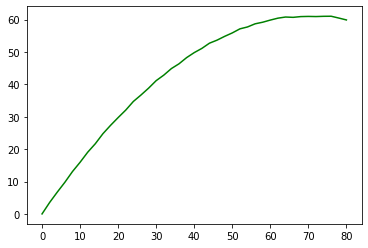

In [12]:
plt.plot(df['x(n)'], df['y(n)'],"g")
plt.show()

In [53]:
def Lin_Reg(yarr, N):

    H = []
    for i in range(len(yarr)-1, N, -1):
        temp = []
        for j in range(1, N+1):
            temp.append(yarr[i-j])
        H.append(temp)
    H = np.array(H)
    HT = H.transpose()
    HTH = np.matmul(HT, H)
    invHTH_HT = np.matmul(np.linalg.inv(HTH), HT)
    A = np.matmul(invHTH_HT, yarr[:N:-1])
    YAT = np.matmul(yarr[len(yarr)-1:len(yarr)-1-N:-1], A.transpose())
    return YAT

59.60271894409878
59.10938179539997
58.607303291904174
58.06649982842373
57.31175749445767
56.32582751049681
55.46118689499547
54.63515714512121
53.73114528481529
52.774972181908616
51.70163925260395
50.487472202081264
49.24295549140857
48.07325133511016
46.887284855981434
45.64493384938639
44.32191912005527
42.912529008324455
41.459741797119534
40.03860517619486
[ 0.          3.54172536  6.72642195  9.76684448 13.0824747  15.94703086
 19.04904125 21.6703609  24.76455358 27.33746738 29.74362392 32.05649546
 34.72076771 36.70897825 38.82327592 41.15155884 42.85262678 44.87848383
 46.35037073 48.25822881 49.80365002 51.09978029 52.71318852 53.65497243
 54.82565616 55.88252875 57.13791386 57.7264438  58.69510174 59.19010037
 59.85235894 60.44178562 60.79285583 60.69546171 60.92666512 60.98086793
 60.93687345 61.01207725 61.03449831 60.47597829 59.89267916 59.60271894
 59.1093818  58.60730329 58.06649983 57.31175749 56.32582751 55.46118689
 54.63515715 53.73114528 52.77497218 51.70163925 5

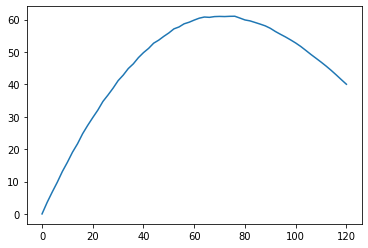

In [52]:
y = np.array(df['y(n)'].head(41)) #remove NaN terms from series
x = np.array(df['x(n)'])

#predict remaining y cordinates
while(len(y)<len(x)):
    #order = 10
    temp = Lin_Reg(y, 10)
    print(temp)
    #convert array to list to append new value
    temp_list = list(y)
    temp_list.append(temp)
    #convert list back into array
    y = np.array(temp_list)

print(y)

plt.plot(x, y)
plt.show()
    